In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('fruit.csv')
X = data[['length_cm', 'weight_g', 'yellow_score']].values
y = data['label'].values.reshape(-1, 1)

In [18]:
y

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1]], dtype=int64)

In [19]:
# Normalize inputs
X = (X - X.mean(axis=0)) / X.std(axis=0)
X

array([[-1.05878415, -1.09864822, -1.05167707],
       [-0.94026354, -0.76060261, -0.76089078],
       [-0.98767178, -0.92962541, -0.90628393],
       [ 0.95606629,  0.92962541,  0.98382694],
       [ 0.83754567,  0.76060261,  0.83843379],
       [ 1.19310751,  1.26767102,  1.12922008],
       [-1.1061924 , -1.26767102, -1.34246336],
       [ 1.00347453,  1.09864822,  1.0419842 ],
       [-0.96396766, -1.03103909, -1.05167707],
       [ 0.90865804,  0.86201629,  0.92566968],
       [-0.91655942, -0.82821173, -0.81904804],
       [ 1.0745869 ,  0.99723453,  1.01290557]])

In [20]:
# Initialize weights
np.random.seed(42)
W = np.random.randn(3, 1)
b = np.random.randn()
print(W,b)

[[ 0.49671415]
 [-0.1382643 ]
 [ 0.64768854]] 1.5230298564080254


In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [22]:
def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred + 1e-9) + (1 - y) * np.log(1 - y_pred + 1e-9))


In [23]:
# Training
lr = 0.1
epochs = 1000
losses = []
accuracies = []

In [24]:
for epoch in range(epochs):
    z = np.dot(X, W) + b
    y_pred = sigmoid(z)
    
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    
    preds = y_pred >= 0.5
    acc = np.mean(preds == y)
    accuracies.append(acc)
    
    # Gradients
    dz = y_pred - y
    dW = np.dot(X.T, dz) / len(y)
    db = np.mean(dz)
    
    # Update
    W -= lr * dW
    b -= lr * db
    if epoch%10==0:
        print('loss',loss)
    if loss < 0.05:
        print(f"Early stopping at epoch {epoch}, loss={loss:.4f}")
        break

loss 0.5344860236897387
loss 0.2603046452356848
loss 0.15809443825308023
loss 0.1107374900514267
loss 0.08448810827932458
loss 0.06807202860999288
loss 0.05692001918812608
Early stopping at epoch 69, loss=0.0496


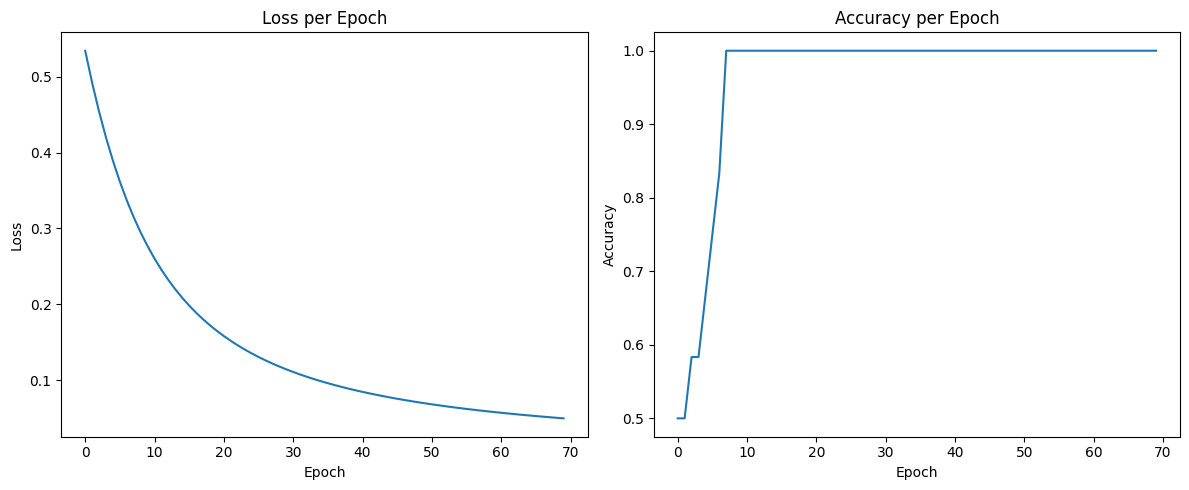

In [25]:


# Plotting
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()
